In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from pathlib import Path
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [2]:
pd.set_option('display.max_columns', None)

In [39]:
pd.set_option('display.max_rows', None)

In [3]:
dataset_path = Path(r"/home/rwth1591/transfer-learning/blue_waters/data/blue_waters_dataset_processed/blue_waters_posix_withapps_no_outliers_no_time.csv")

In [4]:
df_no_outliers = pd.read_csv(dataset_path)

In [4]:
len(df_no_outliers)

686029

In [7]:
df_no_outliers.head()

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,app
0,3114,-20,-20,75409,41501580,61075,3178,0,0,-20,...,0,0,0,0,0,0,-1,213.412935,64,vasp_gam
1,24578,-1010,-1010,2135401,1583602,2345250,248139,0,1,-1010,...,116,0,0,0,0,0,0,413.544116,48,SpEC
2,1120,-73,-73,24831,194999,1194,1691,0,0,-73,...,320,0,0,0,0,0,0,5.714256,32,pw.x
3,2,-3,-3,0,0,0,2,0,0,-3,...,0,0,0,0,0,0,-1,0.015716,1,ApplyObservers
4,40658,-1064,-1064,4264010,3582318,5439002,450505,0,1,-1064,...,451,0,0,0,0,0,0,261.567515,48,SpEC


In [11]:
df_no_outliers.app.unique()

array(['vasp_gam', 'SpEC', 'CCTM_v52_Linux2_x86_64intel', 'pw.x',
       'ApplyObservers', 'gofr.x', 'mosst_dynamo.x', 'lmp_xe6_kc_s',
       'scheduler.x', 'enzo.exe', 'flash4', 'Spells', 'cp.x', 'nwchem',
       'lmp_kc_dep', 'ior', 'caliop', 'a2', 'mdtest', 'PIOL-FFD',
       'Hsigma', 'nek5000', 'lmp_new', 'rad', 'split_read', 'pp.x',
       'dist', 'Grid_64_PF', 'runRSQSim', 'sord-mO', 'qcbim.x',
       'emod3d-mpi', 'osiris-2D.e', 'Climate_MPI', 'Climate_MMW',
       'penc_comm_CAF.x', 'NEKBONE', 'PortOption_MPI', 'vasp54withoutneb',
       'vasp', 'ph-dist', 'comm_penc.x', 'exec', 'harm3d', 'exec_5_1.6',
       'init_atmosphere_model', 'cldradlid09', 'pio_rearr_opts2',
       'coawstM', 'trmm', 'lbm', 'cldradlid08', 'vasp_ncl', 'real.exe',
       'MPPcrystal', 'wrf.exe', 'iotest', 'vasp_std', '3Dspectrum',
       'Radiate08', 'test_mesh_io_speed', 'mctas_wrapper', 'volumeStats',
       'PortCost_MPI', 'enzo_wise_rerun_hdf5_1_8_11.exe', 'Pcrystal',
       'SimClimate_MPI', 'stf',

Most used applications:
- SpEC: Standard Performance Evaluation Corporation, benchmark
- Flash4 physics simulation
- pw.x: Quantum Espresso
- VASP: atomic scale materials modelling, e.g. electronic structure calculations and quantum-mechanical molecular dynamics

In [8]:
df_no_outliers.groupby(by=["app"]).count()["nprocs"].sort_values(ascending=False).head(20)

app
SpEC              310788
mosst_dynamo.x     69417
vasp_gam           65029
Spells             40677
pw.x               28124
ApplyObservers     26298
flash4             24005
enzo.exe           22159
scheduler.x        14891
lmp_new            12815
ior                 6774
caliop              6589
mdtest              6354
sord-mO             5220
PIOL-FFD            5136
Hsigma              3568
nwchem              3325
nek5000             3020
h_r_f               2762
lmp_kc_dep          2489
Name: nprocs, dtype: int64

In [5]:
most_used_apps = df_no_outliers.groupby(by=["app"]).count()["nprocs"].sort_values(ascending=False).index
len(most_used_apps)

614

<AxesSubplot:xlabel='POSIX_TOTAL_TIME'>

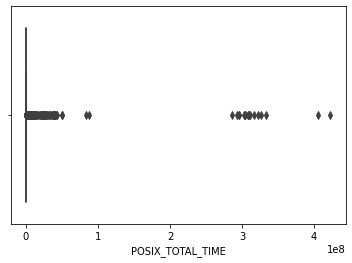

In [9]:
sns.boxplot(x=df_no_outliers.POSIX_TOTAL_TIME)

In [38]:
df_no_outliers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
POSIX_OPENS,659457.0,1.945400e+04,5.865509e+04,0.000000e+00,1.730000e+02,3.102000e+03,1.678900e+04,8.365835e+06
POSIX_FILENOS,659457.0,-1.082080e+03,1.093889e+04,-2.839714e+06,-1.012000e+03,-2.590000e+02,-1.700000e+01,-1.000000e+00
POSIX_DUPS,659457.0,-1.082080e+03,1.093889e+04,-2.839714e+06,-1.012000e+03,-2.590000e+02,-1.700000e+01,-1.000000e+00
POSIX_READS,659457.0,1.424209e+06,2.254194e+07,0.000000e+00,5.420000e+03,1.176620e+05,1.575523e+06,5.071598e+09
POSIX_WRITES,659457.0,3.436807e+06,2.971662e+07,0.000000e+00,4.763000e+03,1.358550e+05,1.301497e+06,9.728632e+09
POSIX_SEEKS,659457.0,1.242548e+06,3.755222e+07,0.000000e+00,2.120000e+02,5.912800e+04,1.249606e+06,1.247776e+10
POSIX_STATS,659457.0,9.435913e+04,2.052229e+05,0.000000e+00,3.870000e+02,3.199000e+03,1.264970e+05,1.437219e+07
POSIX_MMAPS,659457.0,3.144531e+00,2.342422e+02,-6.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.394900e+04
POSIX_FSYNCS,659457.0,1.338135e+01,2.913910e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.097152e+06
POSIX_RENAME_SOURCES,659457.0,-1.082080e+03,1.093889e+04,-2.839714e+06,-1.012000e+03,-2.590000e+02,-1.700000e+01,-1.000000e+00


In [6]:
bytes_read_copy = df_no_outliers.POSIX_BYTES_READ.copy().where(df_no_outliers.POSIX_BYTES_READ > 0,0.1)
bytes_written_copy = df_no_outliers.POSIX_BYTES_WRITTEN.copy().where(df_no_outliers.POSIX_BYTES_WRITTEN > 0,0.1)

In [7]:
def plot_df_w_filter(df,filterexp,x_column,coord,color_data=bytes_read_copy,cmap="viridis"):
    sc = coord.scatter(x=df[filterexp][x_column],y=df[filterexp]["POSIX_TOTAL_TIME"], c=np.log10(color_data[filterexp]),cmap=cmap)
    coord.set_xscale("log")
    coord.set_yscale("log")
    coord.set_xlabel(x_column)
    coord.set_ylabel("POSIX_TOTAL_TIME")
    return sc

In [12]:
def plot_mosaic(filter_spec,filename):
    plt.rcParams.update({'font.size': 25})
    fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(30, 10))
    plt.subplots_adjust(wspace=0.26)
    sc_read = plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_READS",axs[0])
    sc_written = plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_WRITES",axs[1],bytes_written_copy,"plasma")
    divider = make_axes_locatable(axs[0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(sc_read, cax=cax, orientation='vertical',label="POSIX_BYTES_READ")
    divider = make_axes_locatable(axs[1])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(sc_written, cax=cax, orientation='vertical',label="POSIX_BYTES_WRITTEN")
    plt.savefig(Path("../","../","pictures",filename).with_suffix(".png"),format="png",bbox_inches="tight",dpi=600)
    plt.show()

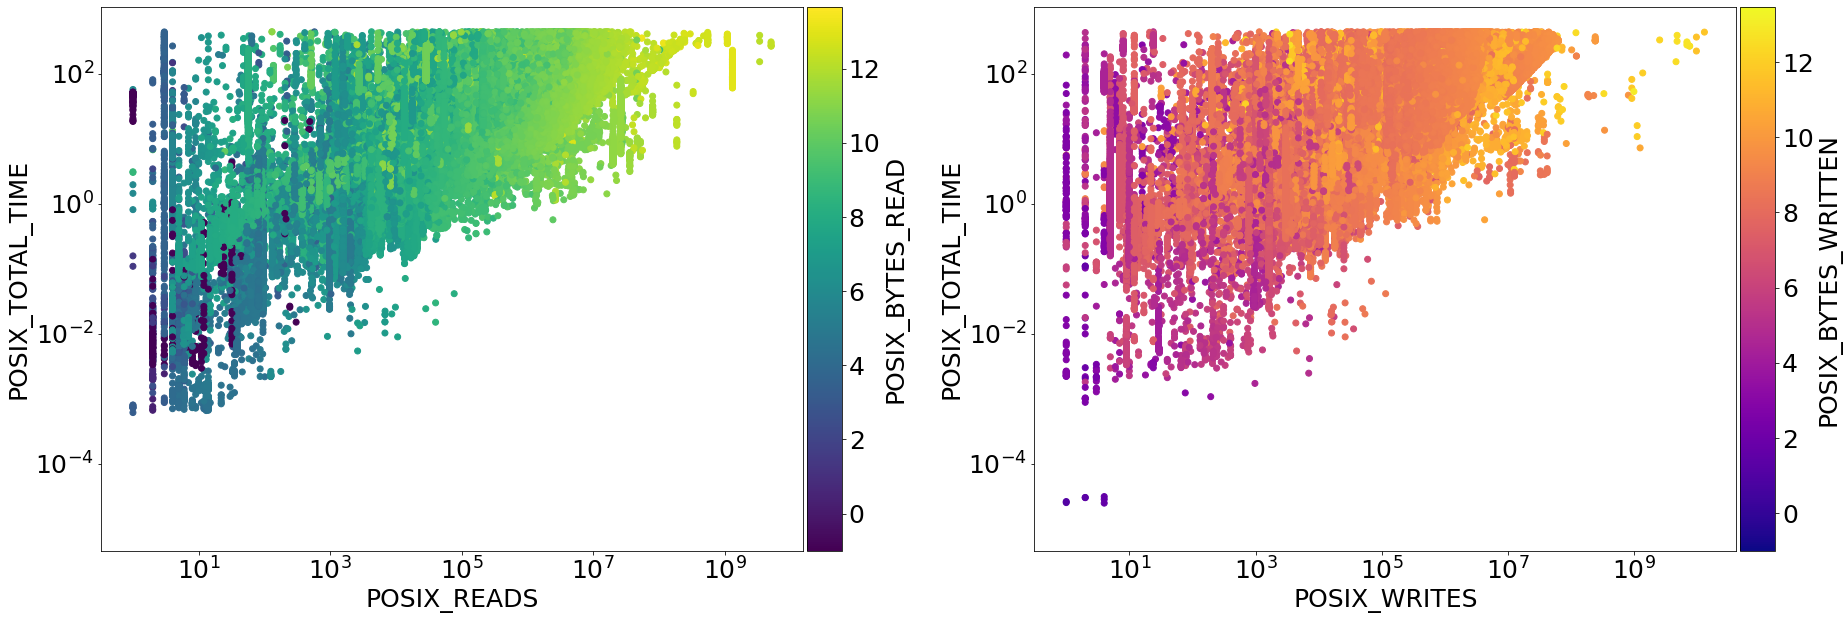

In [13]:
filter_spec = df_no_outliers.app.isin(most_used_apps[0:5])
plot_mosaic((filter_spec == False) | (filter_spec == True),"blue_waters_understand_IQR_all_small_yscale_log")

In at least 30% of the rows the rank is 0 or -1, possibly not known?

In [47]:
len(df_no_outliers["rank"][df_no_outliers["rank"] == -1]) / len(df_no_outliers)

0.5654992433179975

In [48]:
len(df_no_outliers["rank"][df_no_outliers["rank"] == 0]) / len(df_no_outliers)

0.3046198544865632